### Часть 1: исследуем зависимость от стратегии начальной реализации.
Реализовано 4 стратегии:<br>
1) *KMeans++*<br>
2) *Стратегия равномерного распределения*: Область, в которой находятся точки, разбивается на m прямоугольников так, чтобы m было максимально близко к заданному количеству кластеров k (но не больше его). Затем среди этих прямоугольников случайным образом выбираются k, и в качестве начальных центров для кластеров определяются центры этих прямоугольников.<br>
3) *Стратегия случайных чисел*: Находим промежутки по каждой оси ([x0, x1] по абсцисс, [y0, y1] по ординат), в пределах которых расположены заданные точки. Затем k раз выбираем два случайных числа на отрезках [x0, x1] и [y0, y1]. Они станут начальными координатами центров для кластеров.<br>
4) *Стратегия выбора из данных точек*: Выбираем k точек из предложенных случайным образом.<br>
N = 100 (количество точек)<br>
K = 4 (количество кластеров)<br>
Заданное для KMeans количество кластеров **совпадает** с заданным для make_blobs.

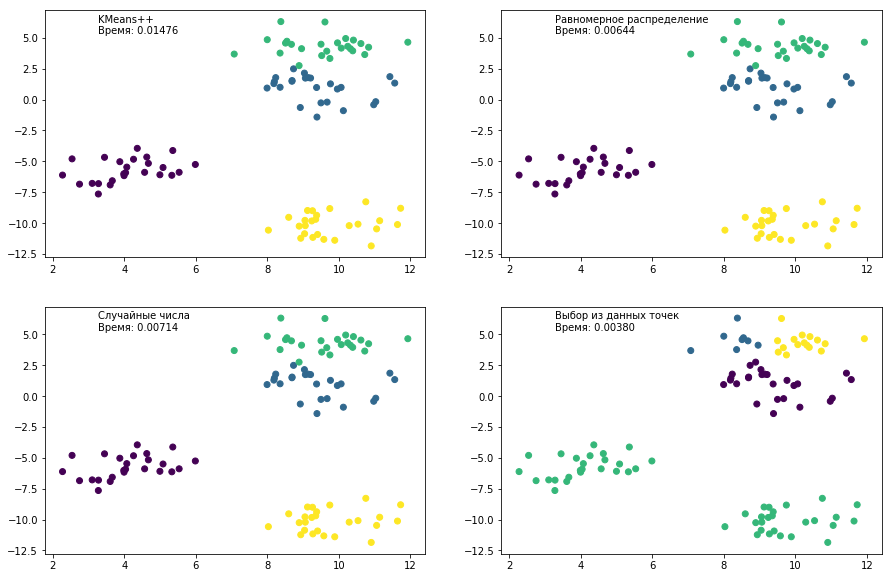

In [5]:
from mylib import *


def show_strats(n, k_for_means, k_for_blobs, after_dot = 7):
    x, _ = make_blobs(n_samples = n, n_features = 2, centers = k_for_blobs, random_state = 4)
    xtext = x[:, 0].min() + 1
    ytext = x[:, 1].max() - 1
    pylab.figure(0, figsize = (15, 10))
    strats = ["plusplus", "uniform", "random", "choice"]
    msg = ["KMeans++\n", "Равномерное распределение\n", "Случайные числа\n", "Выбор из данных точек\n" ]
    for i in range(len(strats)):
        t = time.time()
        st, xc, yc = KMeans4(x, k = k_for_means, strat = strats[i])
        t = time.time() - t
        st, _, _ = clusters_sorted(st, xc, yc)
        pylab.subplot(2, 2, i + 1)
        plt.scatter(x[:, 0], x[:, 1], c = st)
        pylab.text(xtext, ytext, msg[i] + "Время: " + str(t)[:after_dot])
    plt.show()

show_strats(100, 4, 4)

N = 100 <br>
K = 4 <br>
Заданное для KMeans количество кластеров **не совпадает** с заданным для make_blobs.

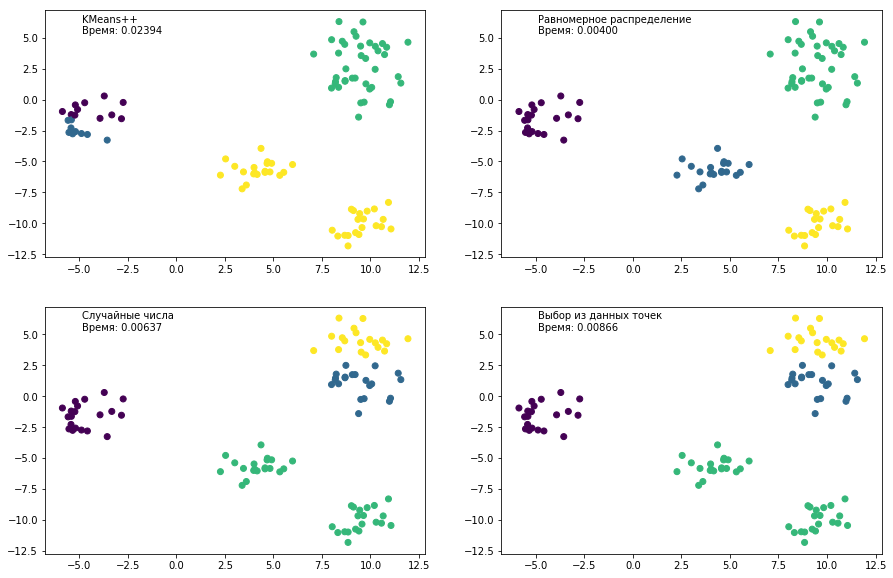

In [4]:
show_strats(100, 4, 5)

N = 1000 (количество точек) <br>
K = 4 (количество кластеров) <br>
Заданное для KMeans количество кластеров **совпадает** с заданным для make_blobs.

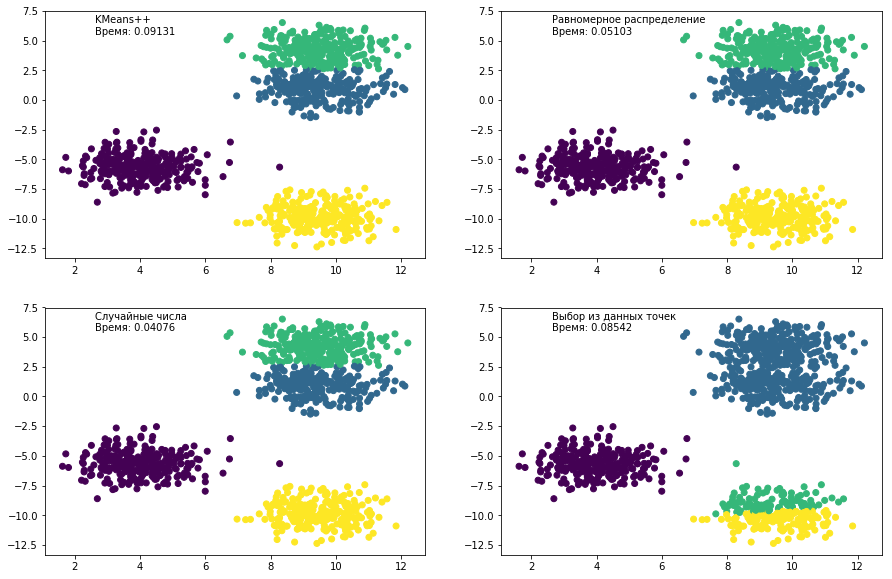

In [5]:
show_strats(1000, 4, 4)

N = 1000 <br>
K = 4 <br>
Заданное для KMeans количество кластеров **не совпадает** с заданным для make_blobs.

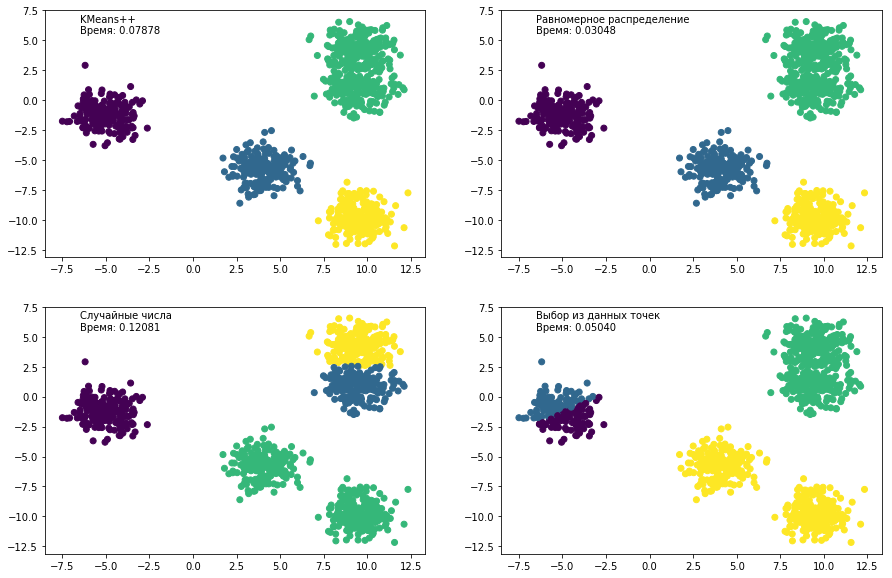

In [6]:
show_strats(1000, 4, 5)

Анализ скорости и точности методов начальной инициализации (по сравнению с библиотечной функцией sklearn.cluster.KMeans)

In [10]:
import pandas as pd
from sklearn.cluster import KMeans


tests = [(100, 3), (1000, 4), (900, 2), (1400, 6), (5000, 8), (600, 5), (1999, 7)]
plus_t = []
uni_t = []
ran_t = []
chs_t = []
times = [plus_t, uni_t, ran_t, chs_t]
plus_a = []
uni_a = []
ran_a = []
chs_a = []
accurs = [plus_a, uni_a, ran_a, chs_a]
for i in range(len(tests)):
    x, _ = make_blobs(n_samples = tests[i][0], n_features = 2, centers = tests[i][1], random_state = 4)
    strats = ["plusplus", "uniform", "random", "choice"]
    true_time = time.time()
    true_cl = KMeans(n_clusters = tests[i][1], random_state = 4).fit_predict(x)
    true_time = time.time() - true_time
    xc, yc = clusters_centers(x, true_cl)
    true_cl, _, _ = clusters_sorted(true_cl, xc, yc)
    for i in range(len(strats)):
        t = time.time()
        cl, xc, yc = KMeans4(x, k = tests[i][1], strat = strats[i])
        t = time.time() - t
        cl, _, _ = clusters_sorted(cl, xc, yc)
        times[i].append(t - true_time)
        overl = list(true_cl == cl).count(True)
        accurs[i].append(overl / tests[i][0])

pd.DataFrame({"n, k": tests, "KMeans++": plus_t, "Uniform": uni_t, "Random": ran_t, "Choice": chs_t})
        

,"n, k",KMeans++,Uniform,Random,Choice
0,"(100, 3)",-0.006023,-0.010093,-0.013823,0.009223
1,"(1000, 4)",0.036851,0.044885,0.016597,0.316136
2,"(900, 2)",0.189717,0.264246,0.018293,0.394006
3,"(1400, 6)",0.057278,0.031663,-0.001247,0.638465
4,"(5000, 8)",0.091219,0.450968,0.125190,0.925352
5,"(600, 5)",0.000341,0.024579,0.018359,0.243983
6,"(1999, 7)",0.076675,0.118181,0.151308,0.295259
